# Results of controlled experiment

In [2]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


### social influence Factors

- coldstart-id: cold-start user identifier;
- user-id: identifier of the users of the group of friends closest to the cold-start user;
- $F_{exp}$: Expert factor of user\_id;
- $F_{fri}$: Friendly Factor of user\_id;
- $F_{lead}$: Leader Factor of user\_id;
- $F_{sim}$: Similarity Factor of user\_id;
- SI: social influence of user\_id on friends group.

In [3]:
df_social_influence = pd.read_csv("fatores_influencia.csv", sep=';', decimal=',')

In [5]:
df_social_influence.rename(columns={"coldstart_code": 'coldstart_id', 'user_code':"user_id"}, inplace=True)

In [6]:
df_social_influence.style

,coldstart_id,user_id,F_exp,F_fri,F_lead,F_sim,Final
0,1.000000,1.000000,0.000000,0.271300,0.474972,0.127470,0.186664
1,1.000000,2.000000,0.753041,0.053228,0.377993,0.130060,0.267225
2,1.000000,5.000000,0.219296,0.014074,0.262373,0.050000,0.102595
3,1.000000,6.000000,0.615091,0.071991,0.494432,0.039216,0.223826
4,1.000000,9.000000,0.700475,0.020467,0.309674,0.067361,0.213787
5,1.000000,12.000000,0.128763,0.010370,0.080556,0.020000,0.047259
6,2.000000,1.000000,0.588198,0.142678,0.291798,0.096359,0.233137
7,2.000000,2.000000,0.000000,0.187722,0.393407,0.134336,0.156248
8,2.000000,6.000000,0.212229,0.082968,0.328291,0.052549,0.129362
9,2.000000,3.000000,0.596618,0.186865,0.407225,0.084615,0.257297


## Recommendation Results

- Coldstart Id: cold-start user identifier
- Music_name: The name associated with each recommended song
- Pred_without_SI: prediction value when RS is not considered Social Influence (SI)
- Pred_with_SI: prediction value when RS considers SI
- R\_system: prediction value with normalized SI
- R\_user: rating given by user cold-start for recommended song

In [10]:
recommendation_results = pd.read_csv("df_comparacao_recomendacoes_total.csv",sep=';', decimal=',')

In [21]:
recommendation_results.rename(columns={"coldstart_code" :"coldstart_id", 
                                       "P_without_influence": "Pred_without_SI",
                                       "P_with_influence": "Pred_with_SI",  
                                       'R_system_with_influence': 'R_system'}, inplace=True)

In [22]:
recommendation_results.style

,coldstart_id,music_name,Pred_without_SI,Pred_with_SI,R_system,R_user
0,1.000000,In the End,1.375147,1.322675,3.000000,4
1,1.000000,Chop Suey!,1.263870,1.284016,3.000000,4
2,1.000000,Numb,1.331783,1.283669,3.000000,3
3,1.000000,Mr. Brightside,1.143388,1.278782,3.000000,4
4,1.000000,Everlong,1.220736,1.275883,3.000000,3
5,1.000000,Wonderwall - Remastered,1.175076,1.242023,3.000000,4
6,1.000000,Nirvana smells like teen spirit - remix,1.173671,1.228955,3.000000,2
7,1.000000,Scar Tissue,1.176952,1.227972,3.000000,4
8,2.000000,The Scientist,1.851048,2.200128,5.000000,3
9,2.000000,Somebody That I Used To Know,1.921395,2.167504,5.000000,5


### Distribution of ratings with social influence

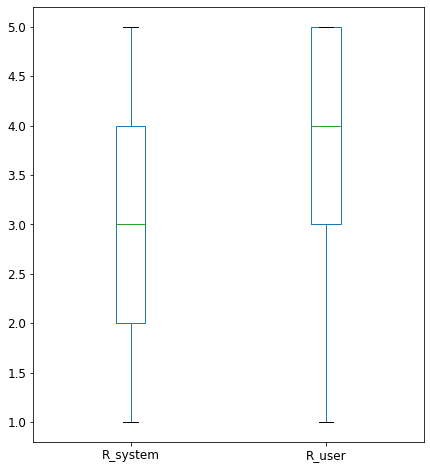

In [23]:
recommendation_results.boxplot(column=['R_system','R_user'], grid=False, fontsize=12, figsize=(7,8))

## RMSE

In [24]:
rmse_influencia = sqrt(mean_squared_error(recommendation_results.R_user, recommendation_results.R_system))
rmse_influencia

1.8584798541875702

## Recommendation Results of main Users

In [16]:
results_main_users = pd.read_csv("df_comparacao_recomendacoes_main_users.csv",sep=';', decimal=',')

In [20]:
results_main_users.style

,coldstart_code,name,prediction,R_system,R_user
0,1.000000,In the End,1.322675,3.000000,4
1,1.000000,Chop Suey!,1.284016,3.000000,4
2,1.000000,Numb,1.283669,3.000000,3
3,1.000000,Mr. Brightside,1.278782,3.000000,4
4,1.000000,Everlong,1.275883,3.000000,3
5,1.000000,Wonderwall - Remastered,1.242023,3.000000,4
6,1.000000,Nirvana smells like teen spirit - remix,1.228955,3.000000,2
7,1.000000,Scar Tissue,1.227972,3.000000,4
8,1.000000,Use Somebody,1.220950,3.000000,4
9,1.000000,I Miss You,1.206332,3.000000,3


### Distribution of ratings with social influence of main users

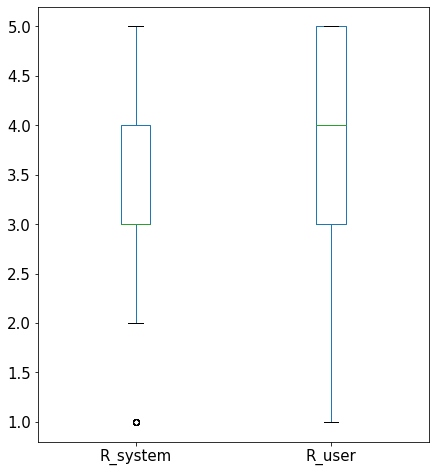

In [17]:
results_main_users.boxplot(column=['R_system','R_user'], grid=False, fontsize=15, figsize=(7,8))


## RMSE

In [19]:
rmse_main = sqrt(mean_squared_error(results_main_users.R_user, results_main_users.R_system))
rmse_main

1.5651403865245448